# packages

In [19]:
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture
from random import sample
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
import collections
from sklearn.metrics import accuracy_score, homogeneity_score

# 1 Import datasets

#### 1.1 mobile price data

In [2]:
raw_data_d1 = pd.read_csv('mobile_price_range.csv')
print("data dimensions:" ,raw_data_d1.shape)
print("label classes: ", raw_data_d1.price_range.value_counts())

data dimensions: (2000, 21)
label classes:  1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


In [3]:
X1_o = raw_data_d1.loc[:,raw_data_d1.columns!= 'price_range']
y1 = raw_data_d1['price_range']
X1 = preprocessing.scale(X1_o)

#### 1.2 iris dataset

In [4]:
iris = datasets.load_iris()
X2 = iris.data
y2 = iris.target

In [7]:

collections.Counter(y2)

Counter({0: 50, 1: 50, 2: 50})

# 2 Clustering Algorithms on both datasets

## 2.1 K-means

In [9]:
random_seed = 15
# Find the optimal k
k_grid = np.arange(2, 10)

loss1 = np.zeros(k_grid.size)
loss2 = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X1)
    loss1[idx] = kmeans.inertia_
    kmeans.fit(X2)
    loss2[idx] = kmeans.inertia_

k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9


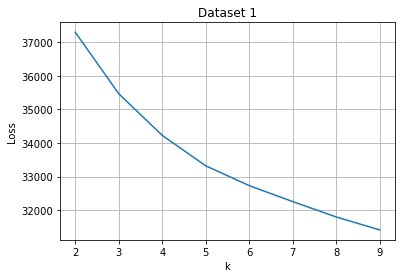

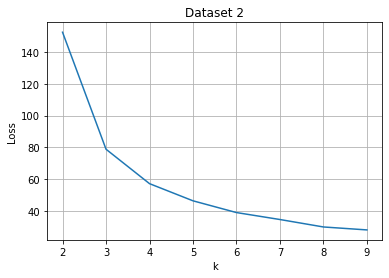

In [10]:
# Plot loss vs k to find best k
plt.figure()
plt.plot(k_grid, loss1)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 1')
plt.grid()
plt.savefig('kmeans_loss_1.png')

plt.figure()
plt.plot(k_grid, loss2)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 2')
plt.grid()
plt.savefig('kmeans_loss_2.png')

In [11]:
# Choose k according to the approximate elbow location
k1 = 5
k2 = 3
# Run kmeans again with optimal k values
kmeans1 = KMeans(n_clusters=k1, random_state=random_seed)
kmeans2 = KMeans(n_clusters=k2, random_state=random_seed)
kmeans1.fit(X1)
kmeans2.fit(X2)

KMeans(n_clusters=3, random_state=15)

In [16]:
y1_hat = kmeans1.predict(X1)
y2_hat = kmeans2.predict(X2)

In [18]:
print(collections.Counter(y1_hat))
print(collections.Counter(y2_hat))


Counter({4: 480, 3: 456, 2: 371, 0: 351, 1: 342})
Counter({2: 62, 1: 50, 0: 38})


In [20]:
confusion_matrix(y1, y1_hat)

array([[ 65,  52, 127, 127, 129],
       [ 85,  85,  96, 115, 119],
       [101,  80,  83, 109, 127],
       [100, 125,  65, 105, 105],
       [  0,   0,   0,   0,   0]])

In [21]:
confusion_matrix(y2, y2_hat)

array([[ 0, 50,  0],
       [ 2,  0, 48],
       [36,  0, 14]])

In [22]:
# Evaluate quality of clusters¶

print ("<------------------------ Dataset 1 ------------------------>")
print('Inertia: ', kmeans1.inertia_)
score1 = silhouette_score(X1, y1_hat)
print('Silhouette score: ', score1)
ami1 = adjusted_mutual_info_score(y1, y1_hat)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('Inertia: ', kmeans2.inertia_)
score2 = silhouette_score(X2, y2_hat)
print('Silhouette score: ', score2)
ami2 = adjusted_mutual_info_score(y2, y2_hat)
print('Adjusted Mutual Information (AMI) score: ', ami2)
print()

<------------------------ Dataset 1 ------------------------>
Inertia:  33322.500754611705
Silhouette score:  0.053724132870786034
Adjusted Mutual Information (AMI) score:  0.009545066371671584

<------------------------ Dataset 2 ------------------------>
Inertia:  78.851441426146
Silhouette score:  0.5528190123564095
Adjusted Mutual Information (AMI) score:  0.7551191675800482



# visualisation of clusters

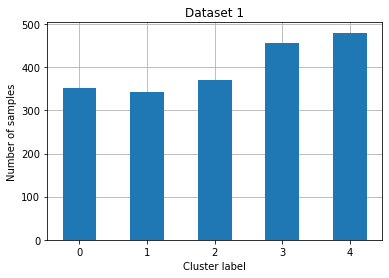

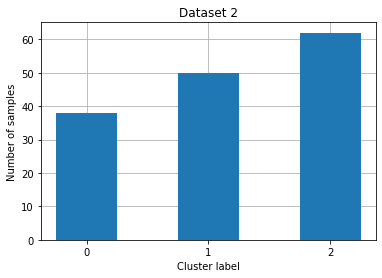

In [23]:
# Dataset 1
plt.figure()
plt.hist(kmeans1.labels_, bins=np.arange(0, k1 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k1))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 1')
plt.grid()
plt.savefig('kmeans_hist_1.png')

# Dataset 2
plt.figure()
plt.hist(kmeans2.labels_, bins=np.arange(0, k2 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k2))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 2')
plt.grid()
plt.savefig('kmeans_hist_2.png')

## 2.2 Expectation Maximisation - Gaussian Mixture Model

In [24]:
# Find the optimal number of components using BIC
n_components_grid1 = np.arange(2, 51,2)
n_components_grid2 = np.arange(2, 31,1)
bic1 = np.zeros(n_components_grid1.size)
bic2 = np.zeros(n_components_grid2.size)

print ("<------------------------ Dataset 1 ------------------------>")
for idx, n_components in enumerate(n_components_grid1):
    print ("Number of components = ", n_components)
    gmm1 = GaussianMixture(n_components=n_components, random_state=random_seed,covariance_type="full")
    gmm1.fit(X1)
    bic1[idx] = gmm1.bic(X1)
print()
print ("<------------------------ Dataset 2 ------------------------>")
for idx, n_components in enumerate(n_components_grid2):
    print ("Number of components = ", n_components)
    gmm2 = GaussianMixture(n_components=n_components, random_state=random_seed,covariance_type="full")
    gmm2.fit(X2)
    bic2[idx] = gmm2.bic(X2)


<------------------------ Dataset 1 ------------------------>
Number of components =  2
Number of components =  4
Number of components =  6
Number of components =  8
Number of components =  10
Number of components =  12
Number of components =  14
Number of components =  16
Number of components =  18
Number of components =  20
Number of components =  22
Number of components =  24
Number of components =  26
Number of components =  28
Number of components =  30
Number of components =  32
Number of components =  34
Number of components =  36
Number of components =  38
Number of components =  40
Number of components =  42
Number of components =  44
Number of components =  46
Number of components =  48
Number of components =  50

<------------------------ Dataset 2 ------------------------>
Number of components =  2
Number of components =  3
Number of components =  4
Number of components =  5
Number of components =  6
Number of components =  7
Number of components =  8
Number of components =

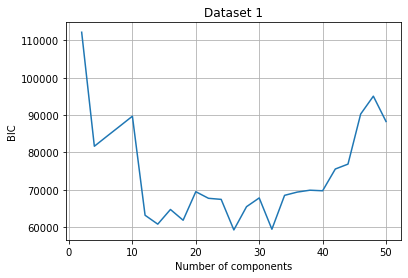

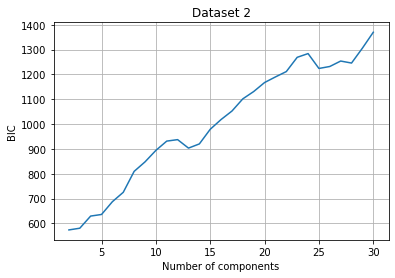

In [25]:

# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid1, bic1)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 1')
plt.grid()
plt.savefig('gmm_bic_1.png')

plt.figure()
plt.plot(n_components_grid2, bic2)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 2')
plt.grid()
plt.savefig('gmm_bic_2.png')

In [26]:
n_best_1 = n_components_grid1[np.argmin(bic1)]
print('Optimal number of components for dataset 1: ', n_best_1)
n_best_2 = n_components_grid2[np.argmin(bic2)]
print('Optimal number of components for dataset 2: ', n_best_2)

Optimal number of components for dataset 1:  26
Optimal number of components for dataset 2:  2


In [27]:
# Run GMM-EM again with the optimal number of components
gmm1 = GaussianMixture(n_components=n_best_1, random_state=random_seed, max_iter=1000)
gmm2 = GaussianMixture(n_components=n_best_2, random_state=random_seed, max_iter=1000)
gmm1.fit(X1)
gmm_labels1 = gmm1.predict(X1)
gmm2.fit(X2)
gmm_labels2 = gmm2.predict(X2)

In [28]:
print ("<------------------------ Dataset 1 ------------------------>")
print('BIC: ', gmm1.bic(X1))
score1_gmm = silhouette_score(X1, gmm_labels1)
print('Silhouette score: ', score1_gmm)
ami1_gmm = adjusted_mutual_info_score(y1, gmm_labels1)
print('Adjusted Mutual Information (AMI) score: ', ami1_gmm)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('BIC: ', gmm2.bic(X2))
score2_gmm = silhouette_score(X2, gmm_labels2)
print('Silhouette score: ', score2_gmm)
ami2_gmm = adjusted_mutual_info_score(y2, gmm_labels2)
print('Adjusted Mutual Information (AMI) score: ', ami2_gmm)
print()

<------------------------ Dataset 1 ------------------------>
BIC:  59222.23444141944
Silhouette score:  -0.01743420597461889
Adjusted Mutual Information (AMI) score:  0.009779586790335646

<------------------------ Dataset 2 ------------------------>
BIC:  574.0178327207459
Silhouette score:  0.6867350732769776
Adjusted Mutual Information (AMI) score:  0.7315847607219583



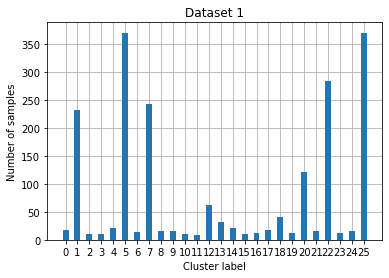

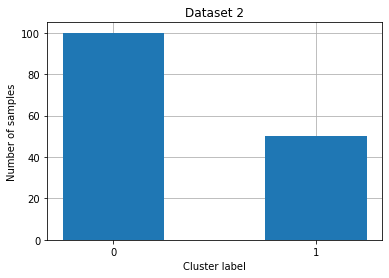

In [29]:
# Dataset 1
plt.figure()
plt.hist(gmm_labels1, bins=np.arange(0, n_best_1 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, n_best_1))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 1')
plt.grid()
plt.savefig('gmm_hist_1.png')

# Dataset 2
plt.figure()
plt.hist(gmm_labels2, bins=np.arange(0, n_best_2 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, n_best_2))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 2')
plt.grid()
plt.savefig('gmm_hist_2.png')

# 3 Dimension Reductions Algorithms

#### 3.1.1 PCA Original

In [33]:
pca1 = PCA()
pca1.fit(X1)

pca2 = PCA()
pca2.fit(X2)

PCA()

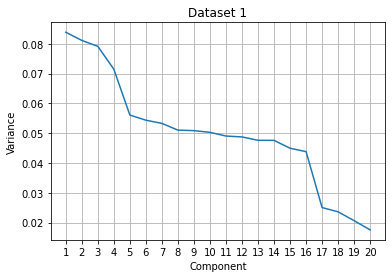

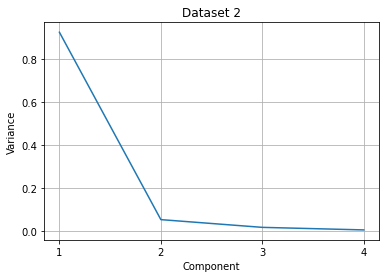

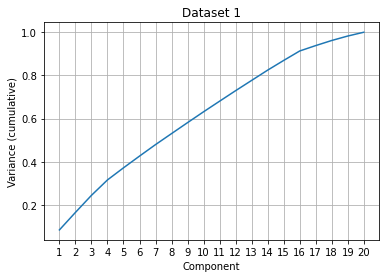

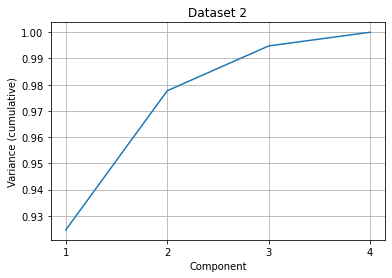

In [34]:
# Plot variance explained by each component to find the best number of components
plt.figure()
plt.plot(np.arange(1, pca1.explained_variance_ratio_.size + 1), pca1.explained_variance_ratio_)
plt.xticks(np.arange(1, pca1.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Dataset 1')
plt.grid()
plt.savefig('pca_var_1.png')

plt.figure()
plt.plot(np.arange(1, pca2.explained_variance_ratio_.size + 1), pca2.explained_variance_ratio_)
plt.xticks(np.arange(1, pca2.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Dataset 2')
plt.grid()
plt.savefig('pca_var_2.png')

plt.figure()
plt.plot(np.arange(1, pca1.explained_variance_ratio_.size + 1), np.cumsum(pca1.explained_variance_ratio_))
plt.xticks(np.arange(1, pca1.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance (cumulative)')
plt.title('Dataset 1')
plt.grid()
plt.savefig('pca_var_cum_1.png')

plt.figure()
plt.plot(np.arange(1, pca2.explained_variance_ratio_.size + 1), np.cumsum(pca2.explained_variance_ratio_))
plt.xticks(np.arange(1, pca2.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance (cumulative)')
plt.title('Dataset 2')
plt.grid()
plt.savefig('pca_var_cum_2.png')

In [35]:
# Choose the number of components that capture 85% of the variance
n1 = 16
n2 = 2

# Transform the data
pca1 = PCA(n_components=n1)
X1_transform = pca1.fit_transform(X1)
pca2 = PCA(n_components=n2)
X2_transform = pca2.fit_transform(X2)

#### Reconstruction error

In [36]:
X1_inverse = pca1.inverse_transform(X1_transform)
mse1 = np.sum(np.square(X1 - X1_inverse))/X1_inverse.size
print('MSE for dataset 1: ', mse1)
X2_inverse = pca2.inverse_transform(X2_transform)
mse2 = np.sum(np.square(X2 - X2_inverse))/X2_inverse.size
print('MSE for dataset 2: ', mse2)

MSE for dataset 1:  0.08683991351394246
MSE for dataset 2:  0.02534107393239825


#### 3.1.2 PCA + Kmeans

In [39]:
# Find the optimal k
k_grid = np.arange(2, 10)

loss1 = np.zeros(k_grid.size)
loss2 = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X1_transform)
    loss1[idx] = kmeans.inertia_
    kmeans.fit(X2_transform)
    loss2[idx] = kmeans.inertia_

k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9


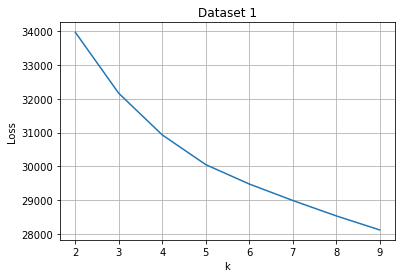

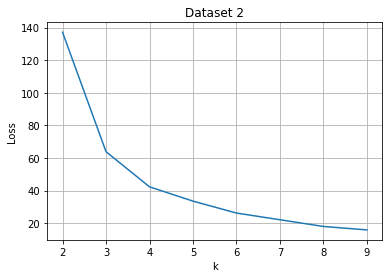

In [40]:
# Plot loss vs k to find best k
plt.figure()
plt.plot(k_grid, loss1)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 1')
plt.grid()
plt.savefig('pca_kmeans_loss_1.png')

plt.figure()
plt.plot(k_grid, loss2)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 2')
plt.grid()
plt.savefig('pca_kmeans_loss_2.png')

In [41]:
# Choose k according to the approximate elbow location
k1 = 4
k2 = 3
# Run kmeans again with optimal k values
kmeans1 = KMeans(n_clusters=k1, random_state=random_seed)
kmeans2 = KMeans(n_clusters=k2, random_state=random_seed)
kmeans1.fit(X1_transform)
kmeans2.fit(X2_transform)

KMeans(n_clusters=3, random_state=15)

In [42]:
y1_hat = kmeans1.predict(X1_transform)
y2_hat = kmeans2.predict(X2_transform)
# Evaluate quality of clusters¶

print ("<------------------------ Dataset 1 ------------------------>")
print('Inertia: ', kmeans1.inertia_)
score1 = silhouette_score(X1_transform, y1_hat)
print('Silhouette score: ', score1)
ami1 = adjusted_mutual_info_score(y1, y1_hat)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('Inertia: ', kmeans2.inertia_)
score2 = silhouette_score(X2_transform, y2_hat)
print('Silhouette score: ', score2)
ami2 = adjusted_mutual_info_score(y2, y2_hat)
print('Adjusted Mutual Information (AMI) score: ', ami2)
print()

<------------------------ Dataset 1 ------------------------>
Inertia:  30930.586457304806
Silhouette score:  0.0604261102145996
Adjusted Mutual Information (AMI) score:  0.007000591628158418

<------------------------ Dataset 2 ------------------------>
Inertia:  63.819942022001264
Silhouette score:  0.597676421954799
Adjusted Mutual Information (AMI) score:  0.7386548254402865



#### 3.1.3 PCA + EM

In [43]:
# Find the optimal number of components using BIC
n_components_grid1 = np.arange(2, 51,2)
n_components_grid2 = np.arange(2, 31,1)
bic1 = np.zeros(n_components_grid1.size)
bic2 = np.zeros(n_components_grid2.size)

print ("<------------------------ Dataset 1 ------------------------>")
for idx, n_components in enumerate(n_components_grid1):
    print ("Number of components = ", n_components)
    gmm1 = GaussianMixture(n_components=n_components, random_state=random_seed,covariance_type="full")
    gmm1.fit(X1_transform)
    bic1[idx] = gmm1.bic(X1_transform)
print()
print ("<------------------------ Dataset 2 ------------------------>")
for idx, n_components in enumerate(n_components_grid2):
    print ("Number of components = ", n_components)
    gmm2 = GaussianMixture(n_components=n_components, random_state=random_seed,covariance_type="full")
    gmm2.fit(X2_transform)
    bic2[idx] = gmm2.bic(X2_transform)


<------------------------ Dataset 1 ------------------------>
Number of components =  2
Number of components =  4
Number of components =  6
Number of components =  8
Number of components =  10
Number of components =  12
Number of components =  14
Number of components =  16
Number of components =  18
Number of components =  20
Number of components =  22
Number of components =  24
Number of components =  26
Number of components =  28
Number of components =  30
Number of components =  32
Number of components =  34
Number of components =  36
Number of components =  38
Number of components =  40
Number of components =  42
Number of components =  44
Number of components =  46
Number of components =  48
Number of components =  50

<------------------------ Dataset 2 ------------------------>
Number of components =  2
Number of components =  3
Number of components =  4
Number of components =  5
Number of components =  6
Number of components =  7
Number of components =  8
Number of components =

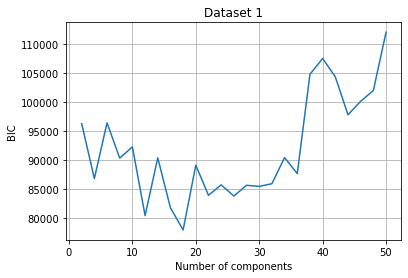

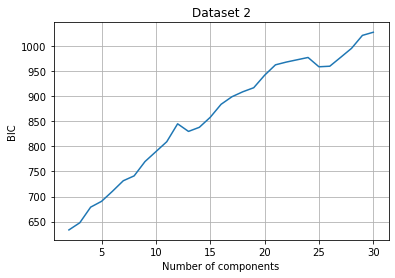

In [44]:

# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid1, bic1)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 1')
plt.grid()
plt.savefig('pca_gmm_bic_1.png')

plt.figure()
plt.plot(n_components_grid2, bic2)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 2')
plt.grid()
plt.savefig('pca_gmm_bic_2.png')

In [45]:
n_best_1 = n_components_grid1[np.argmin(bic1)]
print('Optimal number of components for dataset 1: ', n_best_1)
n_best_2 = n_components_grid2[np.argmin(bic2)]
print('Optimal number of components for dataset 2: ', n_best_2)

Optimal number of components for dataset 1:  18
Optimal number of components for dataset 2:  2


In [46]:
# Run GMM-EM again with the optimal number of components
gmm1 = GaussianMixture(n_components=n_best_1, random_state=random_seed, max_iter=1000)
gmm2 = GaussianMixture(n_components=n_best_2, random_state=random_seed, max_iter=1000)
gmm1.fit(X1_transform)
gmm_labels1 = gmm1.predict(X1_transform)
gmm2.fit(X2_transform)
gmm_labels2 = gmm2.predict(X2_transform)

In [47]:
print ("<------------------------ Dataset 1 ------------------------>")
print('BIC: ', gmm1.bic(X1_transform))
score1_gmm = silhouette_score(X1_transform, gmm_labels1)
print('Silhouette score: ', score1_gmm)
ami1_gmm = adjusted_mutual_info_score(y1, gmm_labels1)
print('Adjusted Mutual Information (AMI) score: ', ami1_gmm)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('BIC: ', gmm2.bic(X2_transform))
score2_gmm = silhouette_score(X2_transform, gmm_labels2)
print('Silhouette score: ', score2_gmm)
ami2_gmm = adjusted_mutual_info_score(y2, gmm_labels2)
print('Adjusted Mutual Information (AMI) score: ', ami2_gmm)
print()

<------------------------ Dataset 1 ------------------------>
BIC:  77908.80768676705
Silhouette score:  0.012840567176654319
Adjusted Mutual Information (AMI) score:  0.0043454081674375025

<------------------------ Dataset 2 ------------------------>
BIC:  633.3246990825106
Silhouette score:  0.711235373323721
Adjusted Mutual Information (AMI) score:  0.7315847607219583



#### 3.2 ICA

In [48]:
from sklearn.decomposition import FastICA
from sklearn.metrics import mean_squared_error

In [49]:
ica1 = FastICA(random_state=random_seed)
S_ica1 = ica1.fit(X1).transform(X1)  # Estimate the sources
S_ica1 /= S_ica1.std(axis=0)

ica2 = FastICA(random_state=random_seed)
S_ica2 = ica2.fit(X2).transform(X2)  # Estimate the sources
S_ica2 /= S_ica2.std(axis=0)

/opt/conda/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:468: UserWarning: n_components is too large: it will be set to 20
  warnings.warn(


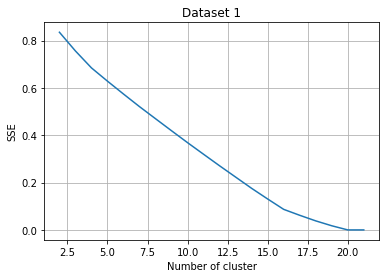

In [50]:
rc_errors1 = {}
dim1 = list(range(2,22,1))
for dim in dim1:
    ica = FastICA(n_components=dim, random_state=random_seed)
    x_prime = ica.fit_transform(X1)
    
    # reconstruction
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X1, reconstructed)    
    rc_errors1[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors1.keys()), list(rc_errors1.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('Dataset 1')
plt.grid()
plt.savefig('ica_var1.png')

/opt/conda/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:468: UserWarning: n_components is too large: it will be set to 4
  warnings.warn(


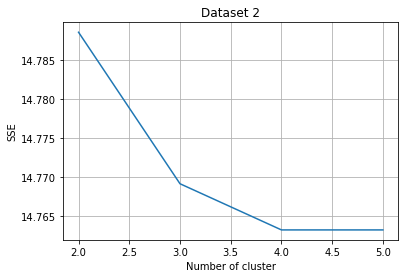

In [51]:
rc_errors2 = {}
dim2 = list(range(2,6,1))
ica = None
for dim in dim2:
    ica = FastICA(n_components=dim, random_state=random_seed)
    x_prime = ica.fit_transform(X2)
    
    # reconstruction
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X2, reconstructed)    
    rc_errors2[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors2.keys()), list(rc_errors2.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('Dataset 2')
plt.grid()
plt.savefig('ica_var2.png')

#### 3.2.2 ICA + K-MEANS

In [56]:
ica1 = FastICA(n_components=16, random_state=random_seed)
X1_transform = ica1.fit_transform(X1)
ica2 = FastICA(n_components=4, random_state=random_seed)
X2_transform = ica2.fit_transform(X2)


In [57]:
# Find the optimal k
k_grid = np.arange(2, 10)

loss1 = np.zeros(k_grid.size)
loss2 = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X1_transform)
    loss1[idx] = kmeans.inertia_
    kmeans.fit(X2_transform)
    loss2[idx] = kmeans.inertia_

k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9


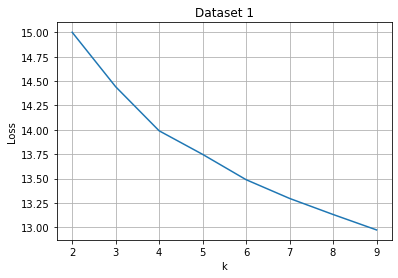

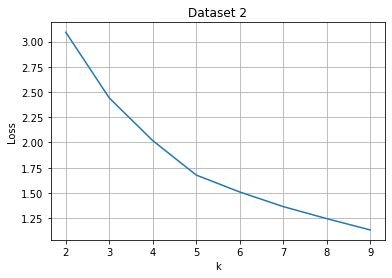

In [59]:
# Plot loss vs k to find best k
plt.figure()
plt.plot(k_grid, loss1)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 1')
plt.grid()
plt.savefig('ica_kmeans_loss_1.png')

plt.figure()
plt.plot(k_grid, loss2)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 2')
plt.grid()
plt.savefig('ica_kmeans_loss_2.png')

In [60]:
# Choose k according to the approximate elbow location
k1 = 4
k2 = 5
# Run kmeans again with optimal k values
kmeans1 = KMeans(n_clusters=k1, random_state=random_seed)
kmeans2 = KMeans(n_clusters=k2, random_state=random_seed)
kmeans1.fit(X1_transform)
kmeans2.fit(X2_transform)

y1_hat = kmeans1.predict(X1_transform)
y2_hat = kmeans2.predict(X2_transform)

# Evaluate quality of clusters¶

print ("<------------------------ Dataset 1 ------------------------>")
print('Inertia: ', kmeans1.inertia_)
score1 = silhouette_score(X1_transform, y1_hat)
print('Silhouette score: ', score1)
ami1 = adjusted_mutual_info_score(y1, y1_hat)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('Inertia: ', kmeans2.inertia_)
score2 = silhouette_score(X2_transform, y2_hat)
print('Silhouette score: ', score2)
ami2 = adjusted_mutual_info_score(y2, y2_hat)
print('Adjusted Mutual Information (AMI) score: ', ami2)
print()

<------------------------ Dataset 1 ------------------------>
Inertia:  13.989580684593632
Silhouette score:  0.0664080900569957
Adjusted Mutual Information (AMI) score:  -8.29857915199895e-05

<------------------------ Dataset 2 ------------------------>
Inertia:  1.6770316597098116
Silhouette score:  0.29954498063615775
Adjusted Mutual Information (AMI) score:  0.5277042942402687



#### 3.2.3 ICA + EM

In [61]:
# Find the optimal number of components using BIC
n_components_grid1 = np.arange(2, 51,2)
n_components_grid2 = np.arange(2, 31,1)
bic1 = np.zeros(n_components_grid1.size)
bic2 = np.zeros(n_components_grid2.size)

print ("<------------------------ Dataset 1 ------------------------>")
for idx, n_components in enumerate(n_components_grid1):
    print ("Number of components = ", n_components)
    gmm1 = GaussianMixture(n_components=n_components, random_state=random_seed,covariance_type="full")
    gmm1.fit(X1_transform)
    bic1[idx] = gmm1.bic(X1_transform)
print()
print ("<------------------------ Dataset 2 ------------------------>")
for idx, n_components in enumerate(n_components_grid2):
    print ("Number of components = ", n_components)
    gmm2 = GaussianMixture(n_components=n_components, random_state=random_seed,covariance_type="full")
    gmm2.fit(X2_transform)
    bic2[idx] = gmm2.bic(X2_transform)


<------------------------ Dataset 1 ------------------------>
Number of components =  2
Number of components =  4
Number of components =  6
Number of components =  8
Number of components =  10
Number of components =  12
Number of components =  14
Number of components =  16
Number of components =  18
Number of components =  20
Number of components =  22
Number of components =  24
Number of components =  26
Number of components =  28
Number of components =  30
Number of components =  32
Number of components =  34
Number of components =  36
Number of components =  38
Number of components =  40
Number of components =  42
Number of components =  44
Number of components =  46
Number of components =  48
Number of components =  50

<------------------------ Dataset 2 ------------------------>
Number of components =  2
Number of components =  3
Number of components =  4
Number of components =  5
Number of components =  6
Number of components =  7
Number of components =  8
Number of components =

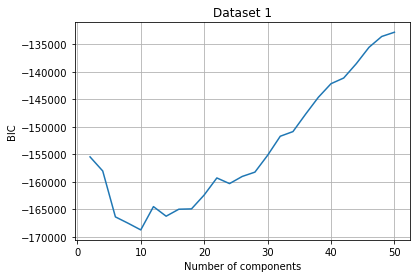

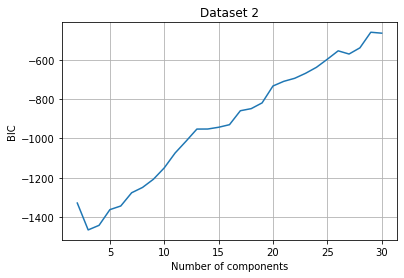

In [62]:

# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid1, bic1)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 1')
plt.grid()
plt.savefig('ica_gmm_bic_1.png')

plt.figure()
plt.plot(n_components_grid2, bic2)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 2')
plt.grid()
plt.savefig('ica_gmm_bic_2.png')

In [63]:
n_best_1 = n_components_grid1[np.argmin(bic1)]
print('Optimal number of components for dataset 1: ', n_best_1)
n_best_2 = n_components_grid2[np.argmin(bic2)]
print('Optimal number of components for dataset 2: ', n_best_2)

Optimal number of components for dataset 1:  10
Optimal number of components for dataset 2:  3


In [64]:
# Run GMM-EM again with the optimal number of components
gmm1 = GaussianMixture(n_components=n_best_1, random_state=random_seed, max_iter=1000)
gmm2 = GaussianMixture(n_components=n_best_2, random_state=random_seed, max_iter=1000)
gmm1.fit(X1_transform)
gmm_labels1 = gmm1.predict(X1_transform)
gmm2.fit(X2_transform)
gmm_labels2 = gmm2.predict(X2_transform)

In [65]:
print ("<------------------------ Dataset 1 ------------------------>")
print('BIC: ', gmm1.bic(X1_transform))
score1_gmm = silhouette_score(X1_transform, gmm_labels1)
print('Silhouette score: ', score1_gmm)
ami1_gmm = adjusted_mutual_info_score(y1, gmm_labels1)
print('Adjusted Mutual Information (AMI) score: ', ami1_gmm)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('BIC: ', gmm2.bic(X2_transform))
score2_gmm = silhouette_score(X2_transform, gmm_labels2)
print('Silhouette score: ', score2_gmm)
ami2_gmm = adjusted_mutual_info_score(y2, gmm_labels2)
print('Adjusted Mutual Information (AMI) score: ', ami2_gmm)
print()

<------------------------ Dataset 1 ------------------------>
BIC:  -168723.70014120772
Silhouette score:  0.04043069761877619
Adjusted Mutual Information (AMI) score:  0.0008688975174063557

<------------------------ Dataset 2 ------------------------>
BIC:  -1464.7192079618667
Silhouette score:  0.26824392288204957
Adjusted Mutual Information (AMI) score:  0.7102517501178441



#### 3 Randomised projections

In [66]:
from sklearn.random_projection import GaussianRandomProjection

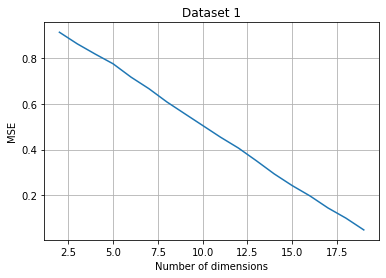

In [68]:
dims_rp_1 = list(range(2,20,1))
rc_errors1 = {}
for dim in dims_rp_1:
    grp = GaussianRandomProjection(n_components=dim, random_state=random_seed)
    x_prime = grp.fit_transform(X1)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X1, reconstructed)    
    rc_errors1[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors1.keys()), list(rc_errors1.values()))
plt.xlabel("Number of dimensions")
plt.ylabel("MSE")
plt.title('Dataset 1')
plt.grid()
plt.savefig('rp_mse_1.png')

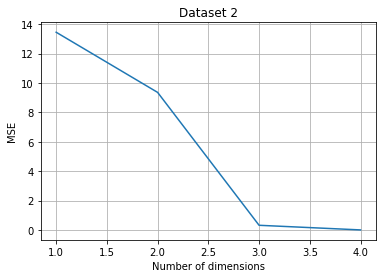

In [73]:
dims_rp_2 = [1,2,3,4]
rc_errors2 = {}
for dim in dims_rp_2:
    grp = GaussianRandomProjection(n_components=dim, random_state=random_seed)
    x_prime = grp.fit_transform(X2)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X2, reconstructed)    
    rc_errors2[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors2.keys()), list(rc_errors2.values()))
plt.xlabel("Number of dimensions")
plt.ylabel("MSE")
plt.title('Dataset 2')
plt.grid()
plt.savefig('rp_mse_2.png')

In [74]:
grp1 = GaussianRandomProjection(n_components=18, random_state=random_seed)
X1_transform =  grp1.fit_transform(X1)
grp2 = GaussianRandomProjection(n_components=3, random_state=random_seed)
X2_transform =  grp2.fit_transform(X2)


#### 3.3.2 RP + K-means

k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9


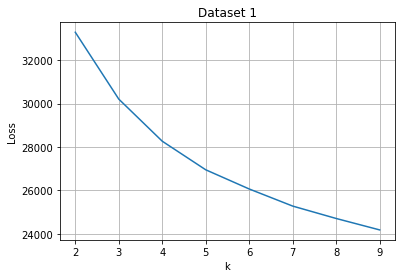

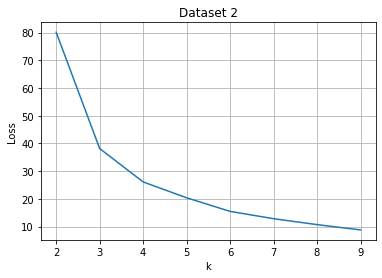

In [75]:
# Find the optimal k
k_grid = np.arange(2, 10)

loss1 = np.zeros(k_grid.size)
loss2 = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X1_transform)
    loss1[idx] = kmeans.inertia_
    kmeans.fit(X2_transform)
    loss2[idx] = kmeans.inertia_
    
# Plot loss vs k to find best k
plt.figure()
plt.plot(k_grid, loss1)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 1')
plt.grid()
plt.savefig('grp_kmeans_loss_1.png')

plt.figure()
plt.plot(k_grid, loss2)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 2')
plt.grid()
plt.savefig('grp_kmeans_loss_2.png')

In [76]:
# Choose k according to the approximate elbow location
k1 = 3
k2 = 3
# Run kmeans again with optimal k values
kmeans1 = KMeans(n_clusters=k1, random_state=random_seed)
kmeans2 = KMeans(n_clusters=k2, random_state=random_seed)
kmeans1.fit(X1_transform)
kmeans2.fit(X2_transform)

y1_hat = kmeans1.predict(X1_transform)
y2_hat = kmeans2.predict(X2_transform)

# Evaluate quality of clusters¶

print ("<------------------------ Dataset 1 ------------------------>")
print('Inertia: ', kmeans1.inertia_)
score1 = silhouette_score(X1_transform, y1_hat)
print('Silhouette score: ', score1)
ami1 = adjusted_mutual_info_score(y1, y1_hat)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('Inertia: ', kmeans2.inertia_)
score2 = silhouette_score(X2_transform, y2_hat)
print('Silhouette score: ', score2)
ami2 = adjusted_mutual_info_score(y2, y2_hat)
print('Adjusted Mutual Information (AMI) score: ', ami2)
print()

<------------------------ Dataset 1 ------------------------>
Inertia:  30202.961146359063
Silhouette score:  0.1048030562885889
Adjusted Mutual Information (AMI) score:  0.025653164468819482

<------------------------ Dataset 2 ------------------------>
Inertia:  38.15514693571934
Silhouette score:  0.5825495770648843
Adjusted Mutual Information (AMI) score:  0.635106090181978



#### 3.3.3 RP + EM

In [77]:
# Find the optimal number of components using BIC
n_components_grid1 = np.arange(2, 51,2)
n_components_grid2 = np.arange(2, 31,1)
bic1 = np.zeros(n_components_grid1.size)
bic2 = np.zeros(n_components_grid2.size)

print ("<------------------------ Dataset 1 ------------------------>")
for idx, n_components in enumerate(n_components_grid1):
    print ("Number of components = ", n_components)
    gmm1 = GaussianMixture(n_components=n_components, random_state=random_seed,covariance_type="full")
    gmm1.fit(X1_transform)
    bic1[idx] = gmm1.bic(X1_transform)
print()
print ("<------------------------ Dataset 2 ------------------------>")
for idx, n_components in enumerate(n_components_grid2):
    print ("Number of components = ", n_components)
    gmm2 = GaussianMixture(n_components=n_components, random_state=random_seed,covariance_type="full")
    gmm2.fit(X2_transform)
    bic2[idx] = gmm2.bic(X2_transform)


<------------------------ Dataset 1 ------------------------>
Number of components =  2
Number of components =  4
Number of components =  6
Number of components =  8
Number of components =  10
Number of components =  12
Number of components =  14
Number of components =  16
Number of components =  18
Number of components =  20
Number of components =  22
Number of components =  24
Number of components =  26
Number of components =  28
Number of components =  30
Number of components =  32
Number of components =  34
Number of components =  36
Number of components =  38
Number of components =  40
Number of components =  42
Number of components =  44
Number of components =  46
Number of components =  48
Number of components =  50

<------------------------ Dataset 2 ------------------------>
Number of components =  2
Number of components =  3
Number of components =  4
Number of components =  5
Number of components =  6
Number of components =  7
Number of components =  8
Number of components =

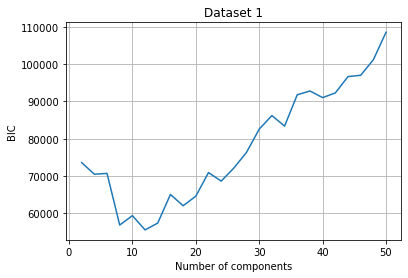

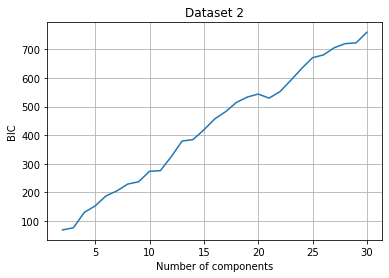

In [78]:

# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid1, bic1)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 1')
plt.grid()
plt.savefig('rp_gmm_bic_1.png')

plt.figure()
plt.plot(n_components_grid2, bic2)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 2')
plt.grid()
plt.savefig('rp_gmm_bic_2.png')

In [79]:
n_best_1 = n_components_grid1[np.argmin(bic1)]
print('Optimal number of components for dataset 1: ', n_best_1)
n_best_2 = n_components_grid2[np.argmin(bic2)]
print('Optimal number of components for dataset 2: ', n_best_2)
# Run GMM-EM again with the optimal number of components
gmm1 = GaussianMixture(n_components=n_best_1, random_state=random_seed, max_iter=1000)
gmm2 = GaussianMixture(n_components=n_best_2, random_state=random_seed, max_iter=1000)
gmm1.fit(X1_transform)
gmm_labels1 = gmm1.predict(X1_transform)
gmm2.fit(X2_transform)
gmm_labels2 = gmm2.predict(X2_transform)

Optimal number of components for dataset 1:  12
Optimal number of components for dataset 2:  2


In [80]:
print ("<------------------------ Dataset 1 ------------------------>")
print('BIC: ', gmm1.bic(X1_transform))
score1_gmm = silhouette_score(X1_transform, gmm_labels1)
print('Silhouette score: ', score1_gmm)
ami1_gmm = adjusted_mutual_info_score(y1, gmm_labels1)
print('Adjusted Mutual Information (AMI) score: ', ami1_gmm)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('BIC: ', gmm2.bic(X2_transform))
score2_gmm = silhouette_score(X2_transform, gmm_labels2)
print('Silhouette score: ', score2_gmm)
ami2_gmm = adjusted_mutual_info_score(y2, gmm_labels2)
print('Adjusted Mutual Information (AMI) score: ', ami2_gmm)
print()

<------------------------ Dataset 1 ------------------------>
BIC:  55525.425130972166
Silhouette score:  0.0006670914502387726
Adjusted Mutual Information (AMI) score:  0.0034859957829687215

<------------------------ Dataset 2 ------------------------>
BIC:  69.34497660655073
Silhouette score:  0.5962445579052298
Adjusted Mutual Information (AMI) score:  0.7315847607219583



#### 3.4.1 Lasso selection

In [82]:
# grid search hyperparameters for lasso regression
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

#### Mobile price

In [83]:
sel_ = SelectFromModel(LogisticRegression(C=0.1, penalty='l1',solver = 'liblinear'))
sel_.fit(X1, y1)
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [84]:
X1_df = pd.DataFrame(data=X1)
selected_feat1 = X1_df.columns[(sel_.get_support())]
print('total features: {}'.format((X1_df.shape[1])))
print('selected features: {}'.format(len(selected_feat1)))


total features: 20
selected features: 18


#### iris

In [85]:
sel_ = SelectFromModel(LogisticRegression(C=0.1, penalty='l1',solver = 'liblinear'))
sel_.fit(X2, y2)
sel_.get_support()

array([ True,  True,  True, False])

In [86]:
X2_df = pd.DataFrame(data=X2)
selected_feat2 = X2_df.columns[(sel_.get_support())]
print('total features: {}'.format((X2_df.shape[1])))
print('selected features: {}'.format(len(selected_feat2)))


total features: 4
selected features: 3


In [91]:
X1_transform = X1_df[X1_df.columns[selected_feat1]]
X2_transform = X2_df[X2_df.columns[selected_feat2]]

#### 3.4.2 Lasso selection + k-means

k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9


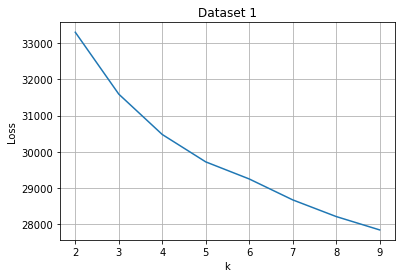

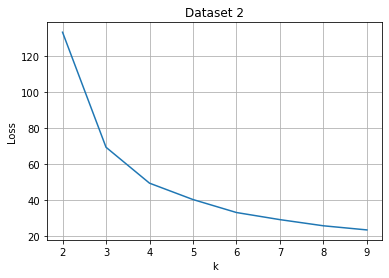

In [92]:
# Find the optimal k
k_grid = np.arange(2, 10)

loss1 = np.zeros(k_grid.size)
loss2 = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X1_transform)
    loss1[idx] = kmeans.inertia_
    kmeans.fit(X2_transform)
    loss2[idx] = kmeans.inertia_
    
# Plot loss vs k to find best k
plt.figure()
plt.plot(k_grid, loss1)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 1')
plt.grid()
plt.savefig('lasso_kmeans_loss_1.png')

plt.figure()
plt.plot(k_grid, loss2)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 2')
plt.grid()
plt.savefig('lasso_kmeans_loss_2.png')

In [93]:
# Choose k according to the approximate elbow location
k1 = 4
k2 = 3
# Run kmeans again with optimal k values
kmeans1 = KMeans(n_clusters=k1, random_state=random_seed)
kmeans2 = KMeans(n_clusters=k2, random_state=random_seed)
kmeans1.fit(X1_transform)
kmeans2.fit(X2_transform)

y1_hat = kmeans1.predict(X1_transform)
y2_hat = kmeans2.predict(X2_transform)

# Evaluate quality of clusters¶

print ("<------------------------ Dataset 1 ------------------------>")
print('Inertia: ', kmeans1.inertia_)
score1 = silhouette_score(X1_transform, y1_hat)
print('Silhouette score: ', score1)
ami1 = adjusted_mutual_info_score(y1, y1_hat)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('Inertia: ', kmeans2.inertia_)
score2 = silhouette_score(X2_transform, y2_hat)
print('Silhouette score: ', score2)
ami2 = adjusted_mutual_info_score(y2, y2_hat)
print('Adjusted Mutual Information (AMI) score: ', ami2)
print()

<------------------------ Dataset 1 ------------------------>
Inertia:  30478.348203427955
Silhouette score:  0.06141425358445146
Adjusted Mutual Information (AMI) score:  0.0074669883605346515

<------------------------ Dataset 2 ------------------------>
Inertia:  69.42973924466338
Silhouette score:  0.5498955809838528
Adjusted Mutual Information (AMI) score:  0.7190219599950003



#### 3.4.3 Lasso selection + EM

In [94]:
# Find the optimal number of components using BIC
n_components_grid1 = np.arange(2, 51,2)
n_components_grid2 = np.arange(2, 31,1)
bic1 = np.zeros(n_components_grid1.size)
bic2 = np.zeros(n_components_grid2.size)

print ("<------------------------ Dataset 1 ------------------------>")
for idx, n_components in enumerate(n_components_grid1):
    print ("Number of components = ", n_components)
    gmm1 = GaussianMixture(n_components=n_components, random_state=random_seed,covariance_type="full")
    gmm1.fit(X1_transform)
    bic1[idx] = gmm1.bic(X1_transform)
print()
print ("<------------------------ Dataset 2 ------------------------>")
for idx, n_components in enumerate(n_components_grid2):
    print ("Number of components = ", n_components)
    gmm2 = GaussianMixture(n_components=n_components, random_state=random_seed,covariance_type="full")
    gmm2.fit(X2_transform)
    bic2[idx] = gmm2.bic(X2_transform)


<------------------------ Dataset 1 ------------------------>
Number of components =  2
Number of components =  4
Number of components =  6
Number of components =  8
Number of components =  10
Number of components =  12
Number of components =  14
Number of components =  16
Number of components =  18
Number of components =  20
Number of components =  22
Number of components =  24
Number of components =  26
Number of components =  28
Number of components =  30
Number of components =  32
Number of components =  34
Number of components =  36
Number of components =  38
Number of components =  40
Number of components =  42
Number of components =  44
Number of components =  46
Number of components =  48
Number of components =  50

<------------------------ Dataset 2 ------------------------>
Number of components =  2
Number of components =  3
Number of components =  4
Number of components =  5
Number of components =  6
Number of components =  7
Number of components =  8
Number of components =

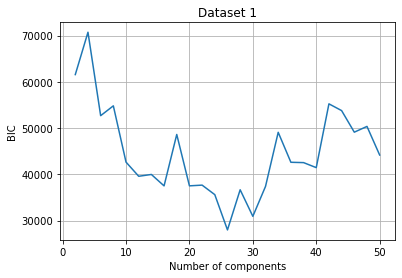

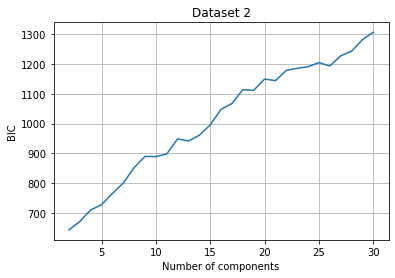

In [95]:

# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid1, bic1)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 1')
plt.grid()
plt.savefig('lasso_gmm_bic_1.png')

plt.figure()
plt.plot(n_components_grid2, bic2)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 2')
plt.grid()
plt.savefig('lasso_gmm_bic_2.png')

In [96]:
n_best_1 = n_components_grid1[np.argmin(bic1)]
print('Optimal number of components for dataset 1: ', n_best_1)
n_best_2 = n_components_grid2[np.argmin(bic2)]
print('Optimal number of components for dataset 2: ', n_best_2)
# Run GMM-EM again with the optimal number of components
gmm1 = GaussianMixture(n_components=n_best_1, random_state=random_seed, max_iter=1000)
gmm2 = GaussianMixture(n_components=n_best_2, random_state=random_seed, max_iter=1000)
gmm1.fit(X1_transform)
gmm_labels1 = gmm1.predict(X1_transform)
gmm2.fit(X2_transform)
gmm_labels2 = gmm2.predict(X2_transform)

Optimal number of components for dataset 1:  26
Optimal number of components for dataset 2:  2


In [97]:
print ("<------------------------ Dataset 1 ------------------------>")
print('BIC: ', gmm1.bic(X1_transform))
score1_gmm = silhouette_score(X1_transform, gmm_labels1)
print('Silhouette score: ', score1_gmm)
ami1_gmm = adjusted_mutual_info_score(y1, gmm_labels1)
print('Adjusted Mutual Information (AMI) score: ', ami1_gmm)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('BIC: ', gmm2.bic(X2_transform))
score2_gmm = silhouette_score(X2_transform, gmm_labels2)
print('Silhouette score: ', score2_gmm)
ami2_gmm = adjusted_mutual_info_score(y2, gmm_labels2)
print('Adjusted Mutual Information (AMI) score: ', ami2_gmm)
print()

<------------------------ Dataset 1 ------------------------>
BIC:  27973.462206100798
Silhouette score:  0.007250587829972857
Adjusted Mutual Information (AMI) score:  0.008454630669645295

<------------------------ Dataset 2 ------------------------>
BIC:  642.0096980720375
Silhouette score:  0.6885194944807573
Adjusted Mutual Information (AMI) score:  0.7315847607219583

